# IMPLEMENTING MLPCLASSIFIER ALGORITHM

In [19]:
#import library packages
import pandas as pd

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load given dataset
data = pd.read_csv("city_day.csv")

In [22]:
df = data.dropna()

In [23]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [24]:
del df['City']
del df['Date']
del df['AQI']

In [25]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],
      dtype='object')

In [26]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,Moderate
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,Moderate
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,Moderate
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,Moderate
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,Moderate


In [27]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,Moderate
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,Moderate
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,Moderate
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,Moderate
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,Moderate


In [28]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='AQI_Bucket', axis=1)
#Response variable
y = df.loc[:,'AQI_Bucket']  

In [29]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  4365
Number of test dataset:  1871
Total number of dataset:  6236


##### Implementing MLPClassifier Algo

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training

In [31]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
predicted = mlp.predict(X_test)

Finding Accuracy

In [32]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of MLPClassifier',accuracy*100)

Accuracy of MLPClassifier 77.87279529663282


Finding Clasiification Report

In [33]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

        Good       0.75      0.58      0.66       136
    Moderate       0.84      0.82      0.83       756
        Poor       0.62      0.79      0.70       195
Satisfactory       0.78      0.83      0.80       624
      Severe       0.69      0.73      0.71        37
   Very Poor       0.74      0.47      0.58       123

    accuracy                           0.78      1871
   macro avg       0.74      0.70      0.71      1871
weighted avg       0.78      0.78      0.78      1871



Finding Confusion matrix

In [34]:
cm = confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[ 79   0   0  57   0   0]
 [  0 623  40  88   0   5]
 [  0  31 155   2   2   5]
 [ 26  83   0 515   0   0]
 [  0   0   0   0  27  10]
 [  0   2  53   0  10  58]]


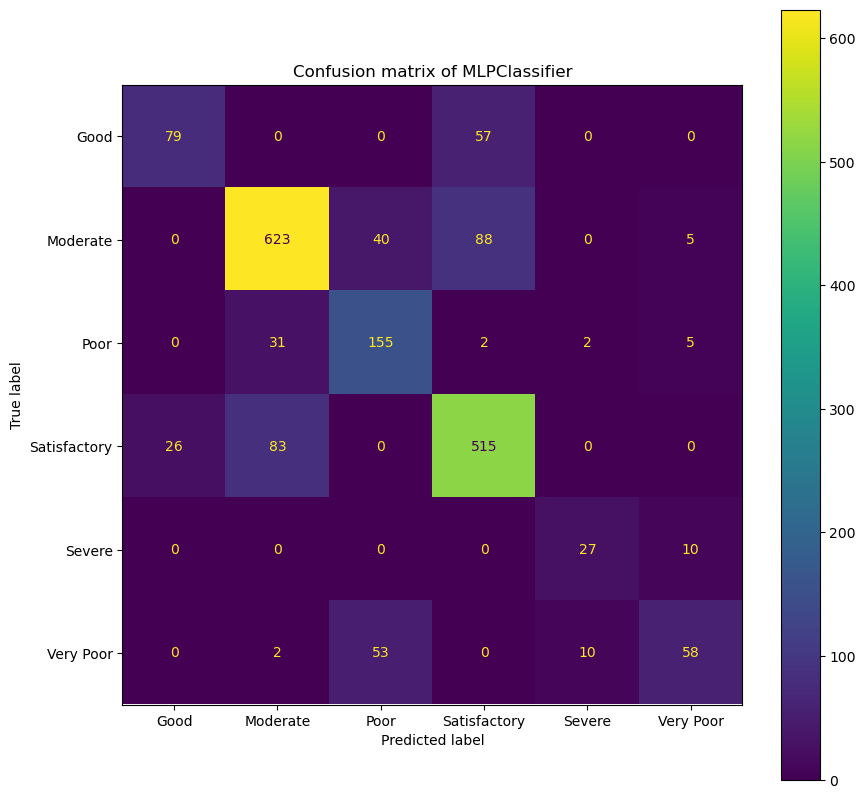

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(mlp, X_test, y_test, ax=ax)
plt.title('Confusion matrix of MLPClassifier')
plt.show()

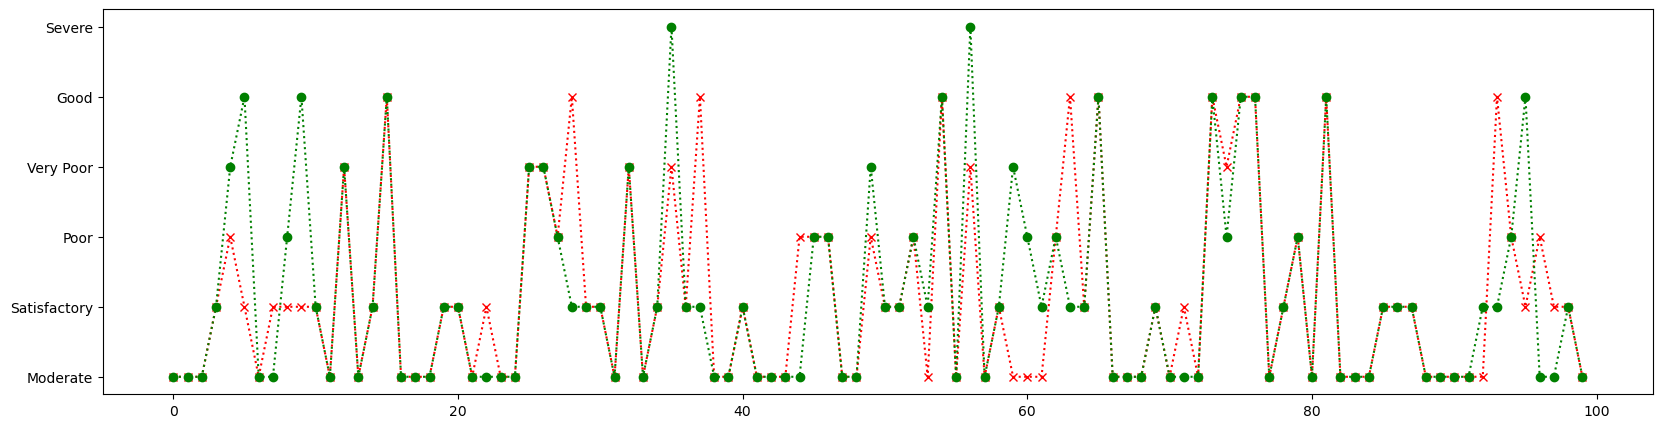

In [36]:
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dotted', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dotted', color='green')
plt.show()